<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 9 - EXTRACCIÓN DE CARACTERÍSTICAS

<ul>
  <li>Introducción</li>
  <li>Descriptores de forma</li>
  <li>Descriptores de contorno</li>
      <li>Descriptores de región</li>
  <li>Descriptores de color y textura</li>
  <li>Temas avanzados</li>

</ul>


<!-- <ul>
<li><b>6.1. Introduccion</b></li>
    <ul>
        <li>Operaciones de conjuntos.</li>
        <li>Elemento estructural.</li>
    </ul>
<li><b>6.2. Caso: Imágenes binarias</b></li>
    <ul>
        <li>6.2.1. Basicas: Dilatación, erosión, apertura y cierre.</li>
        <li>6.2.2. Otras operaciones.</li>
    </ul>
<li><b>6.3. Caso: Imágenes en escala de grises</b></li>
    <ul>
        <li>Dilatación, erosión, apertura y cierre.</li>
        <li>Top-Hat(white, black).</li>
    </ul>
</ul>
<hr>-->

In [2]:
#Importar librerías
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Definir funciones de lectura de imágenes para mayor comodidad
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

# 1 INTRODUCCIÓN
<br>
Para reconocer objetos en las imágenes es necesario encontrar alguna forma de describirlos. Por ejemplo, ¿cómo le puede describir este objeto a alguien que no lo está viendo, teniendo en cuenta solo características visuales? 

<center><i>Figura. Introducción.</i></center>
<img src="res/intro.png" alt="" style="height:300px"></img>

La descripción de los objetos se hace a través de características que podemos medir de los mismos.

Estas características permiten definir vectores de características que se usan para describir  los objetos de la imagen. Así, una característica no es más que alguna medida que se realiza sobre un objeto o la región de una imagen.

Algunas de las características principales extraíbles de los objetos (o de las regiones segmentadas) en una imagen, utilizadas en la etapa de reconocimiento son:

<center><i>Figura. Características.</i></center>
<img src="res/carac.png" alt="" style="height:300px"></img>

### ¿Qué hace a una característica discriminativa? 

Supongamos que queremos separar bananos de peras por su redondez. Construyamos un histograma normalizado de la redondez de las peras y de la redondez de los bananos. ¿Cómo saber si la redondez es discriminante?

<center><i>Figura. Característica discriminativa.</i></center>
<img src="res/disc.png" alt="" style="height:300px"></img>

### Tipos de características

<center><i>Figura. Diferencias, caracterización.</i></center>
<img src="res/diferencias.png" alt="" style="height:300px"></img>

Se espera que las características sean:

**Discriminantes:** Lo que significa que las características deben servir para diferenciar objetos de clases distintas.

**Robustas:** Su extracción debe ser insensible al ruido de captura e iluminación

**Invariantes a las transformaciones: ** Los valores de esas características deben ser independientes de:
- La Traslación (independencia de la posición)
- Rotación y escalado (independencia de la orientación y el tamaño)
- Transformación no lineales de deformación (perspectiva)

**Rapidez de cálculo:** Se deben obtener en un tipo aceptable que depende de la aplicación.


Las características que se pueden obtener en un objeto pueden ser clasificadas, inicialmente, en:

**Globales (Holísticas):** Características que se miden con respecto a los contornos de los objetos. Estas son muy apropiadas cuando el foco principal de la diferenciación es la forma.

**Locales:** Son características que se obtienen de la información de los píxeles que engloban una región. Son apropiadas cuando el objeto principal de diferenciación son propiedades como el color y la textura.


<center><i>Figura. Diferencias locales.</i></center>
<img src="res/difloc.png" alt="" style="height:300px"></img>

# 2. DESCRIPTORES GENERALES SOBRE LA FORMA

Definir la forma de un objeto puede resultar difícil (verbalmente o gráficamente). La forma puede considerarse como la figura exterior (o geometría) de un objeto. 

Es posible describir una forma de un objeto en 2D por medio de algunas de sus propiedades:

- Área
- Perímetro
- Diámetro
- Distancias: máxima y mínima al centro de masas, media al contorno,...
- Ejes mayor y menor, ángulo del eje mayor
- Envolvente (bounding box)
- Número de agujeros
- Proporciones: redondez, areaAgujeros/areaTotal, ... 


<center><i>Figura. Gráficas.</i></center>
<img src="res/caracgraf.png" alt="" style="height:300px"></img>

# 2.1 PERÍMETRO

El perímetro se puede definir con base en los contornos de los objetos:

Se calcula como el número de píxeles que forman el contorno de la forma, por lo que el resultado varía con el tipo de conectividad que se usa.

Procedimiento:

- Se obtiene el contorno binarizando del objeto 
- Se cuentan cuantos píxeles hacen parte del borde del objeto.

<center><i>Figura. Perímetro.</i></center>
<img src="res/perimetro.png" alt="" style="height:300px"></img>

El perímetro es:  1162.3422791987305  píxeles.


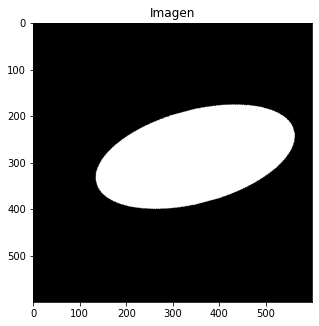

In [3]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

#Crear matriz de zeros de 600x600
image = np.zeros((600, 600))

#Crear una elipse con posición x,y, altura y ancho
rr, cc = ellipse(300, 350, 100, 220)

#Dar el valor 1 a la imagen en el par ordenado generado por la elipse creada
image[rr, cc] = 1
#Rotar la imagen 15° a la derecha
image = rotate(image, angle=15, order=0)

#Etiquetar la imagen, por tanto mostrar la elipse
label_img = label(image)

#Generar un vector de propiedades de la región elíptica
props = regionprops(label_img)

#Imprimir el perímetro de la lista en la posición 0 de la matriz props
print("El perímetro es: ", props[0].perimeter, " píxeles.")

#Crear un subplot y mostrar la imagen de la elipse rotada 15°
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)



# 2.2 ÁREA

El área se puede calcular a partir de los contornos de los objetos o a partir de la segmentación en regiones de los mismos (el segundo caso es más útil).

Procedimiento:
- Se segmenta la imagen, se obtiene el objeto.
- Se calcula el número de píxeles del objeto.

<center><i>Figura. Área.</i></center>
<img src="res/area.png" alt="" style="height:300px"></img>

El área es:  29206  píxeles.


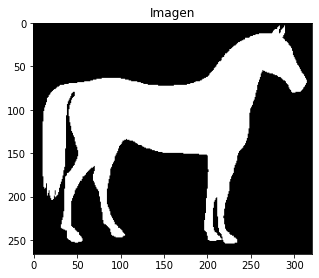

In [4]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

#Leer imagen de entrada
image = img_read('res/horse.png', "gray")

#Etiquetar la imagen de entrada
label_img = label(image)
#Generar las propiedades de la imagen etiquetada
props = regionprops(label_img)
#Calcular el área de la matriz en la posición 0, por tanto del caballo
print("El área es: ", props[0].area, " píxeles.")

#Mostrar la imagen etiquetada
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

El área de una imagen no incluye los huecos que estén presentes en esta, a continuación un ejemplo:

El área de la imagen con huecos es:  27339  píxeles.
El área con huecos rellenados es de  29211  píxeles.


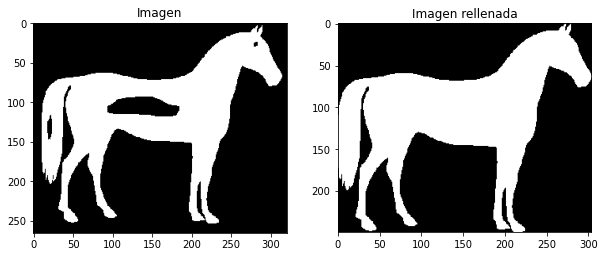

In [5]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

#Leer imagen de entrada
image = img_read('res/horse_holes.png', "gray")

#Etiquetar la imagen y obtener las propiedades de las etiquetas
label_img = label(image)
props = regionprops(label_img)
#Imprimir el área de la imagen con huecos y sin huecos, mediante la función area y filled_area
#respectivamente, como solo hay 1 etiqueta, el caballo, la posición 0 corresponde a éste
print("El área de la imagen con huecos es: ", props[0].area, " píxeles.")
print("El área con huecos rellenados es de ", props[0].filled_area, " píxeles.")

#Mostrar en un subplot 1x2 la imagen y la imagen rellenada
fig, ax = plt.subplots(1,2, figsize=(10, 12))
ax[0].set_title('Imagen')
ax[0].imshow(label_img, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Imagen rellenada')
ax[1].imshow(props[0].filled_image, cmap='gray', vmin=0, vmax=1)

# 2.3 CENTROIDE

El centroide o centro de masa se calcula como el promedio de los valores de las coordenadas de los puntos del contorno del objeto.

<center><i>Figura. Centroide.</i></center>
<img src="res/centroide.png" alt="" style="height:300px"></img>

El centroide es:  (116.09593919057728, 149.63873861535302)


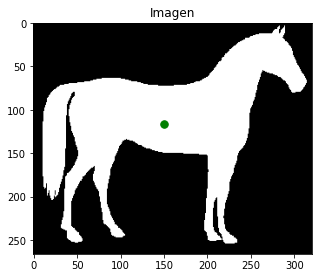

In [6]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
from skimage.transform import rotate

#Leer imagen de entrada
image = img_read('res/horse.png', "gray")

#Etiquetar la imagen y obtener las propiedades de las etiquetas
label_img = label(image)
props = regionprops(label_img)

#Obtener las coordenadas x,y del centroide de la región etiquetada
y0, x0 = props[0].centroid
print("El centroide es: ", props[0].centroid)

#Imprimir la imagen con el centroide pintado de verde
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.plot(x0, y0, '.g', markersize=15)
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

# 2.4 RECTÁNGULO ENVOLVENTE

La caja de Feret o rectángulo envolvente es el aquel que se obtiene con las coordenadas (xmin, ymin) y (xmax, ymax) del objeto de interés.

<center><i>Figura. Bounding Box.</i></center>
<img src="res/boundingbox.png" alt="" style="height:400px"></img>


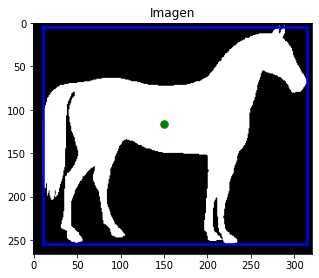

In [7]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
from skimage.transform import rotate

#Crear imagen de ceros 600x600
image = np.zeros((600, 600))

#Leer imagen de entrada, etiquetarla y encontrar las propiedades de la región etiquetada
image = img_read('res/horse.png', "gray")
label_img = label(image)
props = regionprops(label_img)

#Utilizar la función bbox para buscar los 4 puntos que conforman el rectángulo más pequeño
#que puede contener la región etiquetada
minr, minc, maxr, maxc = props[0].bbox
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)


#Mostrar la región que corresponde al rectángulo que encierra la región etiquetada
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.plot(x0, y0, '.g', markersize=15)
ax.plot(bx, by, '-b', linewidth=2.5)
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

# 2.5 EJES

* El Eje Mayor (o Diámetro) es la distancia mayor entre dos puntos cualquiera de la forma, se calcula con base en los contornos.

<center><i>Figura. Eje Mayor.</i></center>
<img src="res/ejema.png" alt="" style="height:300px"></img>


* El Eje Menor tiene la característica de ser perpendicular al eje mayor. 

<center><i>Figura. Eje Menor.</i></center>
<img src="res/ejeme.png" alt="" style="height:300px"></img>

* El eje menor y mayor definen los lados del MER (Maximally Extremal Region).

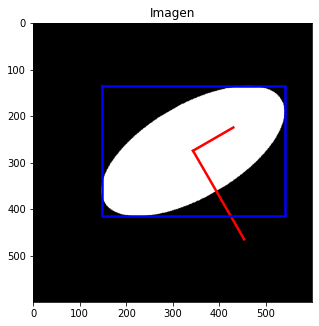

In [8]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

import math
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

#Crear una matriz de ceros 600x600, una elipse, binarizar y rotar 30°
image = np.zeros((600, 600))
rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1
image = rotate(image, angle=30, order=0)

#Etiquetar la imagen con la elipse, encontrar las propiedades de la región etiquetada
label_img = label(image)
props = regionprops(label_img)

#Utilizar la función orientation para encontrar el ángulo de rotación de la imagen
orientation = props[0].orientation

#Calcular el centroide, definir el par ordenado y0,x0 y la bounding box que encierra
#la elipse
centroid = props[0].centroid
(y0,x0) = centroid
minr, minc, maxr, maxc = props[0].bbox

#Calcular los puntos extremos de las líneas rectas que corresponden al eje mayor y al
#eje menor de la elipse, cuyo origen es el centroide
x1 = x0 + math.cos(orientation) * 0.5 * props[0].major_axis_length
y1 = y0 - math.sin(orientation) * 0.5 * props[0].major_axis_length
x2 = x0 - math.sin(orientation) * 0.5 * props[0].minor_axis_length
y2 = y0 - math.cos(orientation) * 0.5 * props[0].minor_axis_length

centroid = props[0].centroid
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)

#Mostrar la imagen con la elipse etiquetada, su bounding box, el centroide y las líneas rectas
#cuyo origen es el centroide y se dirigen a los extremos de la elipse rotada 30°
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
ax.plot(bx, by, '-b', linewidth=2.5)
ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

# 2.6 DISTANCIAS RESPECTO AL CONTORNO

La Distancia Máxima y Mínima entre el centroide y los puntos del contorno

<center><i>Figura. Distancias respecto al contorno.</i></center>
<img src="res/distcontorno.png" alt="" style="height:300px"></img>

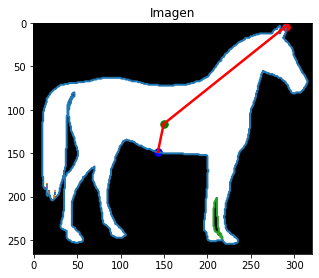

In [9]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

import math
from skimage.draw import ellipse
from skimage.measure import label, regionprops, find_contours
from skimage.transform import rotate

#Definir función de la distancia euclidiana para posiciones de matrices
def euc_distance(p1, p2):
    distance = math.sqrt( (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )
    return distance

#Leer la imagen de entrada, etiquetarla y encontrar la matriz de las regiones etiquetadas
image = img_read('res/horse.png', "gray")
label_img = label(image)
props = regionprops(label_img)

#Encontrar el centroide, la posición y,x, y dibujar los contornos
centroid = props[0].centroid
(y0, x0) = centroid
contours = find_contours(label_img, 0)

contour = contours[0]

#Definir los parámetros de entrada
dist_min = None
min_point = None
dist_max = None
max_point = None

#Ciclo for para iterar las posiciones x,y en la matriz de contornos
for point in contour:
    
    #Definir los puntos xi, yi del contorno, calcular su distancia euclídea
    #respecto al centroide
    xi = point[1]
    yi = point[0]
    dist = euc_distance( (x0,y0) , (xi,yi)  )
    #Condicionales para buscar el punto más cercano y el más lejano al centroide
    if not dist_min or dist < dist_min:
        dist_min = dist
        min_point = (xi, yi)
    if not dist_max or dist > dist_max:
        dist_max = dist
        max_point = (xi, yi)

#Mostrar en la figura la imagen original, contorno dibujado, centroide y puntos más cercanos
#y alejados del mismo
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.plot(x0, y0, '.g', markersize=15)
ax.plot(max_point[0], max_point[1], '.r', markersize=15)
ax.plot(min_point[0], min_point[1], '.b', markersize=15)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax.plot((x0, max_point[0]), (y0, max_point[1]), '-r', linewidth=2.5)
ax.plot((x0, min_point[0]), (y0, min_point[1]), '-r', linewidth=2.5)
#ax.plot(bx, by, '-b', linewidth=2.5)
ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

La Distancia Media del Contorno se define así: sea f una forma con N puntos, sea p, un punto tal que p ∈ f, y d(p, contorno(f)) se define como la distancia mayor entre p y todos los puntos del contorno, entonces la distancia media al contorno (β) se calcula como: 

<center><i>Figura. Distancia Media del Contorno.</i></center>
<img src="res/distmediacontorno.png" alt="" style="height:100px"></img>

La distancia media entre el centroide y el contorno es: 116.05211936912274


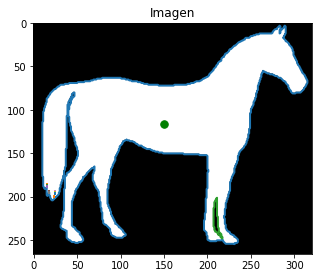

In [10]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

import math
from skimage.draw import ellipse
from skimage.measure import label, regionprops, find_contours
from skimage.transform import rotate

#Definir función de distancia euclidiana para puntos en dos matrices
def euc_distance(p1, p2):
    distance = math.sqrt( (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )
    return distance

#Leer imagen de entrada
image = img_read('res/horse.png', "gray")

#Etiquetar imagen de entrada, generar la matriz de posiciones de los
#contornos encontrados
label_img = label(image)
props = regionprops(label_img)

#Calcular el centroide, su posición y,x
centroid = props[0].centroid
(y0, x0) = centroid

#Dibujar los contornos alrededor de la región etiquetada
contours = find_contours(label_img, 0)
contour = contours[0]

#Definir la distancia acumulada
dist_acum = 0

#Ciclo for que muestra los puntos xi, yi y acumula la distancia euclídea entre
#los puntos con el centroide en cada uno de las iteraciones
for point in contour:
    xi = point[1]
    yi = point[0]
    dist_acum += euc_distance( (x0,y0) , (xi,yi)  )

#La distancia media tal como se muestra en la fórmula ejemplo
dist_med = dist_acum/len(contour)

#Imprimir la distancia media del contorno y el centroide
print("La distancia media entre el centroide y el contorno es:", dist_med)

#Imprimir  la imagen, su centroide y la región etiquetada delimitada por el contorno
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.plot(x0, y0, '.g', markersize=15)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

#ax.plot(bx, by, '-b', linewidth=2.5)
ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

# 2.7 DIAMETRO EQUIVALENTE

Es el perímetro de un círculo con un área igual al del objeto.

El diametro equivalente es de  296.58990823469185  píxeles.


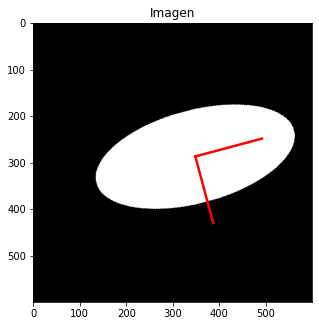

In [11]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

#Crear matriz de ceros 600x600
image = np.zeros((600, 600))

#Dibujar una elipse, rotarla 15° y etiquetarla
rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1
image = rotate(image, angle=15, order=0)
label_img = label(image)
props = regionprops(label_img)

#Utilizar la función equivalent_diameter para calcular el diámetro equivalente a la 
#región etiquetada
diam_equiv = props[0].equivalent_diameter

#Calcular la orientación y el centroide de la región
orientation = props[0].orientation
centroid = props[0].centroid
(y0,x0) = centroid

minr, minc, maxr, maxc = props[0].bbox

#Calcular los extremos de las líneas rectas cuyo origen es el centroide
x1 = x0 + math.cos(orientation) * 0.5 * diam_equiv
y1 = y0 - math.sin(orientation) * 0.5 * diam_equiv
x2 = x0 - math.sin(orientation) * 0.5 * diam_equiv
y2 = y0 - math.cos(orientation) * 0.5 * diam_equiv

#Imprimir el diámetro equivalente
print("El diametro equivalente es de ", diam_equiv, " píxeles.")

#Mostrar la imagen etiquetada con las líneas que van desde el centroide hasta los puntos
#calculados x1,y1,x2,y2
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)


# 2.8 CONVEX HULL

El Convex Hull es el mínimo polígono convexo que puede rodear a un objeto.

<center><i>Figura. Convex Hull.</i></center>
<img src="res/convexhull.png" alt="" style="height:200px"></img>

El área del convex hull es:  56477


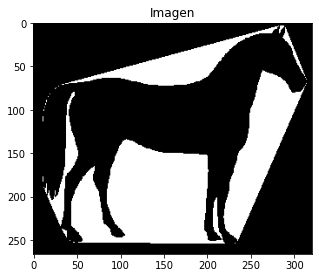

In [12]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
from skimage.morphology import convex_hull_image

#Leer imagen de entrada
image = img_read('res/horse.png', "gray")

#Etiquetar la imagen de entrada y encontrar la matriz de las posiciones de las
#regiones etiquetadas
label_img = label(image)
props = regionprops(label_img)

#Utilizar la función convex_hull_image para obtener la matriz de pares ordenados que
#delimitan el mínimo polígono convexo que rodea la región etiquetada
convex_hull = convex_hull_image(image)

#Calcular el área del polígono e imprimirla
convex_area = props[0].convex_area

print("El área del convex hull es: ", convex_area)

#Mostrar la imagen etiquetada y el polígono rodeándola
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.imshow(convex_hull-label_img, cmap='gray', vmin=0, vmax=1)
#ax.imshow(convex_hull, cmap='gray', vmin=0, vmax=1)

# 2.9 PROPORCIONES Y OTROS DESCRIPTORES

Otros descriptores de forma son las proporciones entre las medidas anteriores. Sean P y A, el perímetro y el área de un objeto, respectivamente. Algunas proporciones de forma son:

- Compacidad:  <big>$ \frac{P^2}{A}$</big>
<br/>
<br/>
- Redondez:  $4π \frac{A}{P^2 }$ (medida inversamente proporcional a la compacidad)
<br/>
<br/>
- Relación área/perímetro:  $\frac{A}{P}$
<br/><br/>

- Extensión:  $\frac{A}{area(rect.envolvente)}$
<br/><br/>
- Elongación (o Excentricidad): $\frac{M}{N}$ (siendo M el eje mayor y N el eje menor)
<br/><br/>
- Solidez:  $\frac{A}{A_{convex}}$
<br/><br/>
- Rectagularidad:  $\frac{A}{area(MRE)}$ 
<br/><br/>

Compacidad:  123.58930613400499
Redondez:  0.10167846238034342
Relación área-perímetro:  15.37253864328791
Extensión:  0.3842894736842105
Solidez:  0.5171308674327603
Elongación:  1.9041329017036657


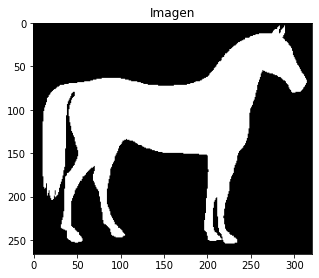

In [13]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

import math
from skimage.draw import ellipse
from skimage.measure import label, regionprops, find_contours
from skimage.transform import rotate

#Leer imagen de entrada, etiquetarla y obtener la matriz de posiciones
image = img_read('res/horse.png', "gray")
label_img = label(image)
props = regionprops(label_img)

#Definir las ecuaciones de las proporciones y otros descriptores, mostrada en la lista
#ejemplo de la parte superior del apartado 2.9
compacidad = props[0].perimeter**2/props[0].area

redondez = 4*math.pi*props[0].area /(props[0].perimeter**2)

rel_area_perimetro = props[0].area / props[0].perimeter

extent = props[0].area / props[0].bbox_area

solidez = props[0].area / props[0].convex_area

elongacion = props[0].major_axis_length/props[0].minor_axis_length

#Imprimir las características de la región etiquetada
print("Compacidad: ", compacidad)
print("Redondez: ", redondez)
print("Relación área-perímetro: ", rel_area_perimetro)
print("Extensión: ", extent)
print("Solidez: ", solidez)
print("Elongación: ", elongacion)

#Mostrar la figura que muestra la imagen etiquetada
fig, ax = plt.subplots(1,1, figsize=(5, 6))


ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

# 2.10 DESCRIPTORES TOPOLÓGICOS

Dentro de los descriptores de forma también se habla de descriptores topológicos, los cuales consideran las propiedades que no se afectan por deformaciones y transformaciones geométricas.

Los descriptores topológicos permiten describir globalmente algunos aspectos estructurales (no métricas) de un objeto. Algunos descriptores de este tipo son:

- El número de agujeros $n_a$ del objeto:


<img src="res/top1.png" alt="" style="height:100px"></img>

- El número de componentes conexas $n_c$ (aplicado a objetos compuestos)

<img src="res/top2.png" alt="" style="height:100px"></img>

- El número de Euler E que se define como: E = $n_c - n_a$

<img src="res/top3.png" alt="" style="height:100px"></img>

Numero de componentes conexas:  2
Número de euler del cuerpo:  -2
Número de euler de la cabeza:  0
Número de huecos del cuerpo:  3
Número de huecos de la cabeza:  1


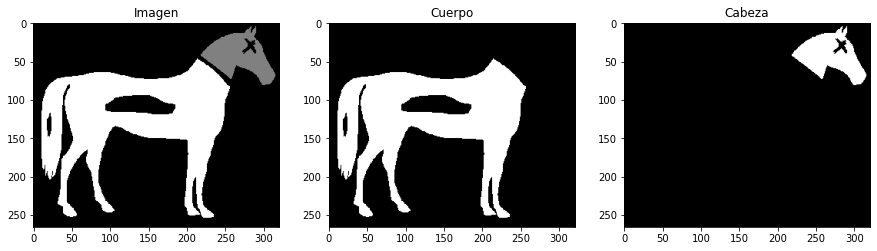

In [14]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

import math
from skimage.draw import ellipse
from skimage.measure import label, regionprops, find_contours
from skimage.transform import rotate

#Leer imagen de entrada
image = img_read('res/horse_beheaded.png', "gray")

#Etiquetar la imagen
#Dado que la imagen de entrada tiene en esta ocasión dos regiones, se obtienen dos "paquetes"
#de coordenadas en la matriz props, que corresponden a una lista de listas de pares ordenados
#de cada una de las regiones
label_img = label(image)
props = regionprops(label_img)
props_cabeza = props[0]
props_cuerpo = props[1]

#Utilizar la función euler_number para calcular el número de euler de cada región
euler_cuerpo = props_cuerpo.euler_number

euler_cabeza = props_cabeza.euler_number

#Imprimir los descriptores topológicos calculados
print("Numero de componentes conexas: ", len(props))

print("Número de euler del cuerpo: ", euler_cuerpo)

print("Número de euler de la cabeza: ", euler_cabeza)

print("Número de huecos del cuerpo: ", -euler_cuerpo+1)

print("Número de huecos de la cabeza: ", -euler_cabeza+1)

#Mostrar en un subplot 1x3 la imagen original, la etiqueta 0 y la etiqueta 1
fig, ax = plt.subplots(1,3, figsize=(15, 16))


ax[0].set_title('Imagen')
ax[0].imshow(label_img, cmap='gray', vmin=0, vmax=2)
ax[1].set_title('Cuerpo')
ax[1].imshow(label_img==2, cmap='gray', vmin=0, vmax=1)
ax[2].set_title('Cabeza')
ax[2].imshow(label_img==1, cmap='gray', vmin=0, vmax=1)


# 3 DESCRIPTORES BASADOS EN PUNTOS DE INTERÉS

Existen otros tipos de descriptores que no son de forma pero que se calculan con base en los puntos o contornos.


# 3.1 CÓDIGOS DE CADENA

Los códigos de cadena: se definen partiendo de un píxel cualquiera del contorno y encadenando la dirección en que se encuentran los puntos adyacentes del contorno mediante un convenio de seguimiento establecido. Se consigue así una cadena de símbolos que determinan unívocamente al objeto, que es invariante a traslaciones.

<center><i>Figura. Código de cadena.</i></center>
<img src="res/cadena1.png" alt="" style="height:200px"></img>


<center>¿Cuál es el código de cadena del siguiente objeto?</center>


<center><i>Figura. Código de cadena.</i></center>
<img src="res/cadena2.png" alt="" style="height:200px"></img>

Una característica medible en los códigos de cadena consiste en contar el número de veces que aparece cada uno de los códigos posibles y dividir por el número total de códigos de la descripción:

También se puede determinar la distancia correspondiente a un mismo código y dividir por la distancia total (los códigos impares tienen distancia √2), p.e. para el caso anterior: 

- Cadena= 00000075444446600007766655444443100001234444322221
- Longitud de Cadena = 50
- $f_i = \frac{1}{50} (14, 3, 5,3, 14, 3,5,3)$


<center><i>Figura. Código de cadena.</i></center>
<img src="res/cadena3.png" alt="" style="height:200px"></img>

# 3.2 CONJUNTO DE PUNTOS CARACTERÍSTICAS (LANDMARK POINTS)

El objeto se describe mediante una colección de puntos (sin orden) que se suelen calcular con detectores de esquinas como Harris-Detector o el algoritmo SIFT (patentado y de difícil instalación). De esta forma, es posible detectar el mismo objeto en otras imágenes.

https://docs.opencv.org/3.4.3/dc/dc3/tutorial_py_matcher.html


<center><i>Figura. SIFT.</i></center>
<img src="res/sift.png" alt="" style="height:300px"></img>

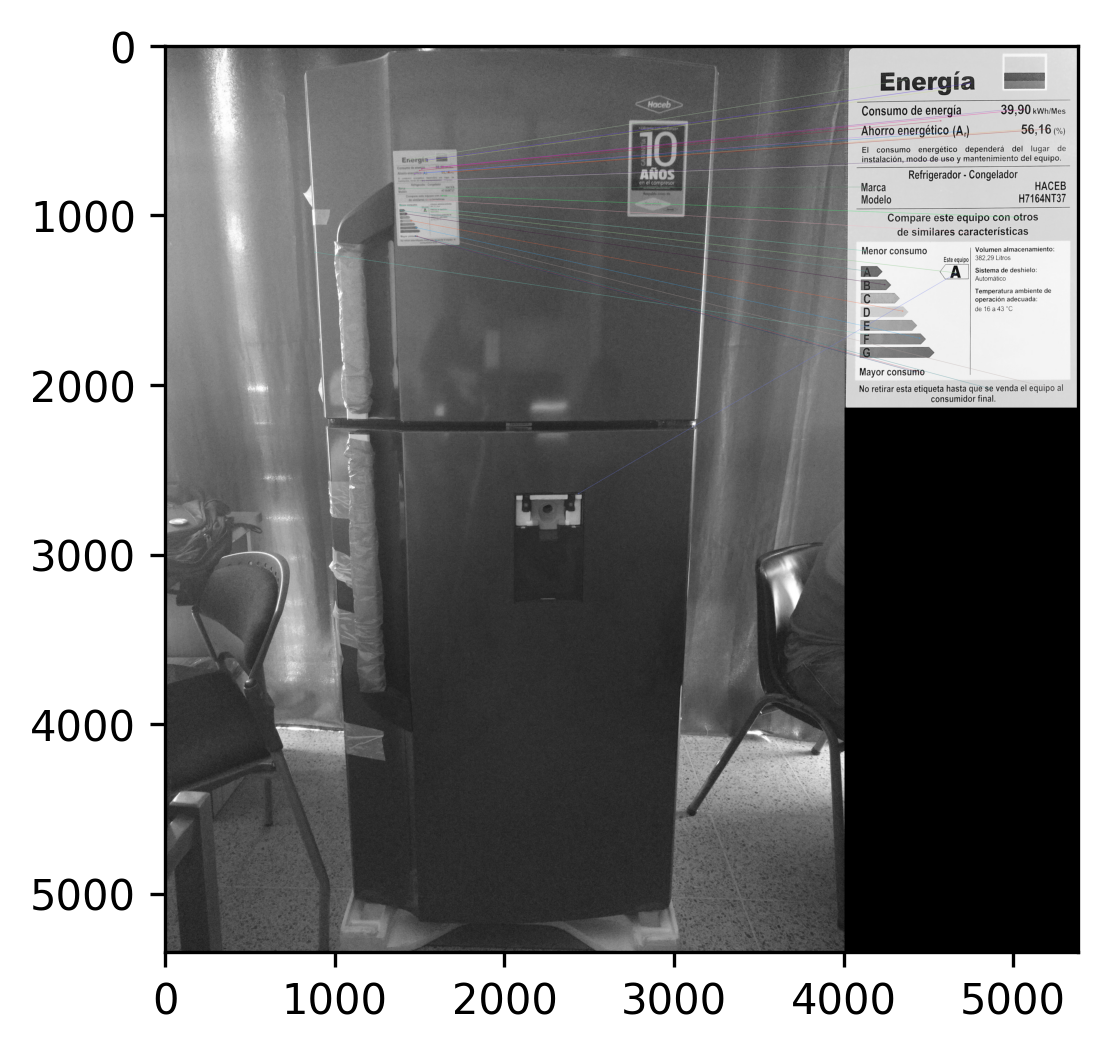

In [16]:
#Importar librerías
import numpy as np
import matplotlib.pyplot as plt

#Leer imagen de entrada y la plantilla con la cual se hace el matching de los puntos
nevera = cv2.imread('res/nevera.jpg',0)          # queryImage
plantilla = cv2.imread('res/plantilla.jpg',0) # trainImage

# Initiate  detector
detector = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp_nevera, des_nevera = detector.detectAndCompute(nevera,None)
kp_plantilla, des_plantilla = detector.detectAndCompute(plantilla,None)
bf = cv2.BFMatcher()

matches = bf.knnMatch(queryDescriptors=np.array(des_nevera), trainDescriptors=np.array(des_plantilla), k=2)
MIN_MATCH_COUNT = 5

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])


#Si encontro suficientes coincidencias
if len(good)>MIN_MATCH_COUNT:
    img3 = nevera
    img3 = cv2.drawMatchesKnn(nevera,kp_nevera,plantilla,kp_plantilla,good,img3,flags=2)
    fig, ax = plt.subplots(dpi=300)
    ax.imshow(img3)
else:
    img3 = None
    print("No se encontraron coincidencias suficientes.")


# 3.3 APROXIMACIÓN DE CURVAS

Un conjunto de primitivas geométricas se ajustan al contorno. Algunos ejemplos son: aproximaciones poligonales, arcos circulares y elípticos, B-splines, entre otros. Este concepto se asemeja al de la transformada de Hough y los contornos de serpiente.

<center><i>Figura. Aproximación de Curvas.</i></center>
<img src="res/aproximacioncurvas.png" alt="" style="height:300px"></img>

Number of coordinates: 22 704 26
Number of coordinates: 1173 32 9
Number of coordinates: 701 21 5


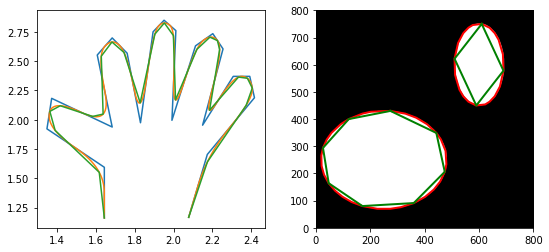

In [17]:
#http://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py

#Importar librerías
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

#Generar un conjunto de puntos que forman una mano
hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

# Subdividir el polígono creado utilizando B-Splines y Splines de 2do grado
new_hand = hand.copy()
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

# Aproximar el polígono mediante el algoritmo de Douglas-Peucker
appr_hand = approximate_polygon(new_hand, tolerance=0.02)

#Imprimir el número de coordenadas de cada aproximación y de la matriz original
print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

#Mostrar las tres aproximaciones en un supblot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.plot(hand[:, 0], hand[:, 1])
ax1.plot(new_hand[:, 0], new_hand[:, 1])
ax1.plot(appr_hand[:, 0], appr_hand[:, 1])


# Crear dos elipses en la imagen
img = np.zeros((800, 800), 'int32')
rr, cc = ellipse(250, 250, 180, 230, img.shape)
img[rr, cc] = 1
rr, cc = ellipse(600, 600, 150, 90, img.shape)
img[rr, cc] = 1

plt.gray()
ax2.imshow(img)

# Aproximar y simplificar las coordenadas de las elipses
for contour in find_contours(img, 0):
    #El polígono que se aproxima corresponde al generado por el contorno de cada elipse
    coords = approximate_polygon(contour, tolerance=2.5)
    ax2.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=39.5)
    ax2.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    print("Number of coordinates:", len(contour), len(coords), len(coords2))

ax2.axis((0, 800, 0, 800))

plt.show()

# 4. DESCRIPTORES DE REGIONES

Existen otros descriptores que se calculan con respecto a la región del objeto.



# 4.1 ESQUELETOS

El más significativo de estos descriptores es el esqueleto del la región, el cual permite reducir una forma a un grafo. Esta estructura se obtiene mediante un “adelgazamiento” (thinning) de la forma.

Un método sencillo para obtener el esqueleto de una forma R con contorno C es como sigue: 

- Para cada punto p ∈ R, se busca su vecino más cercano en C,
- Si p tiene más de un vecino en C se dice que pertenece al esqueleto (o eje central) de R.

Un método alternativo es utilizar la transformada del eje medio (consultar)

<center><i>Figura. Esqueletos.</i></center>
<img src="res/bones.png" alt="" style="height:200px"></img>

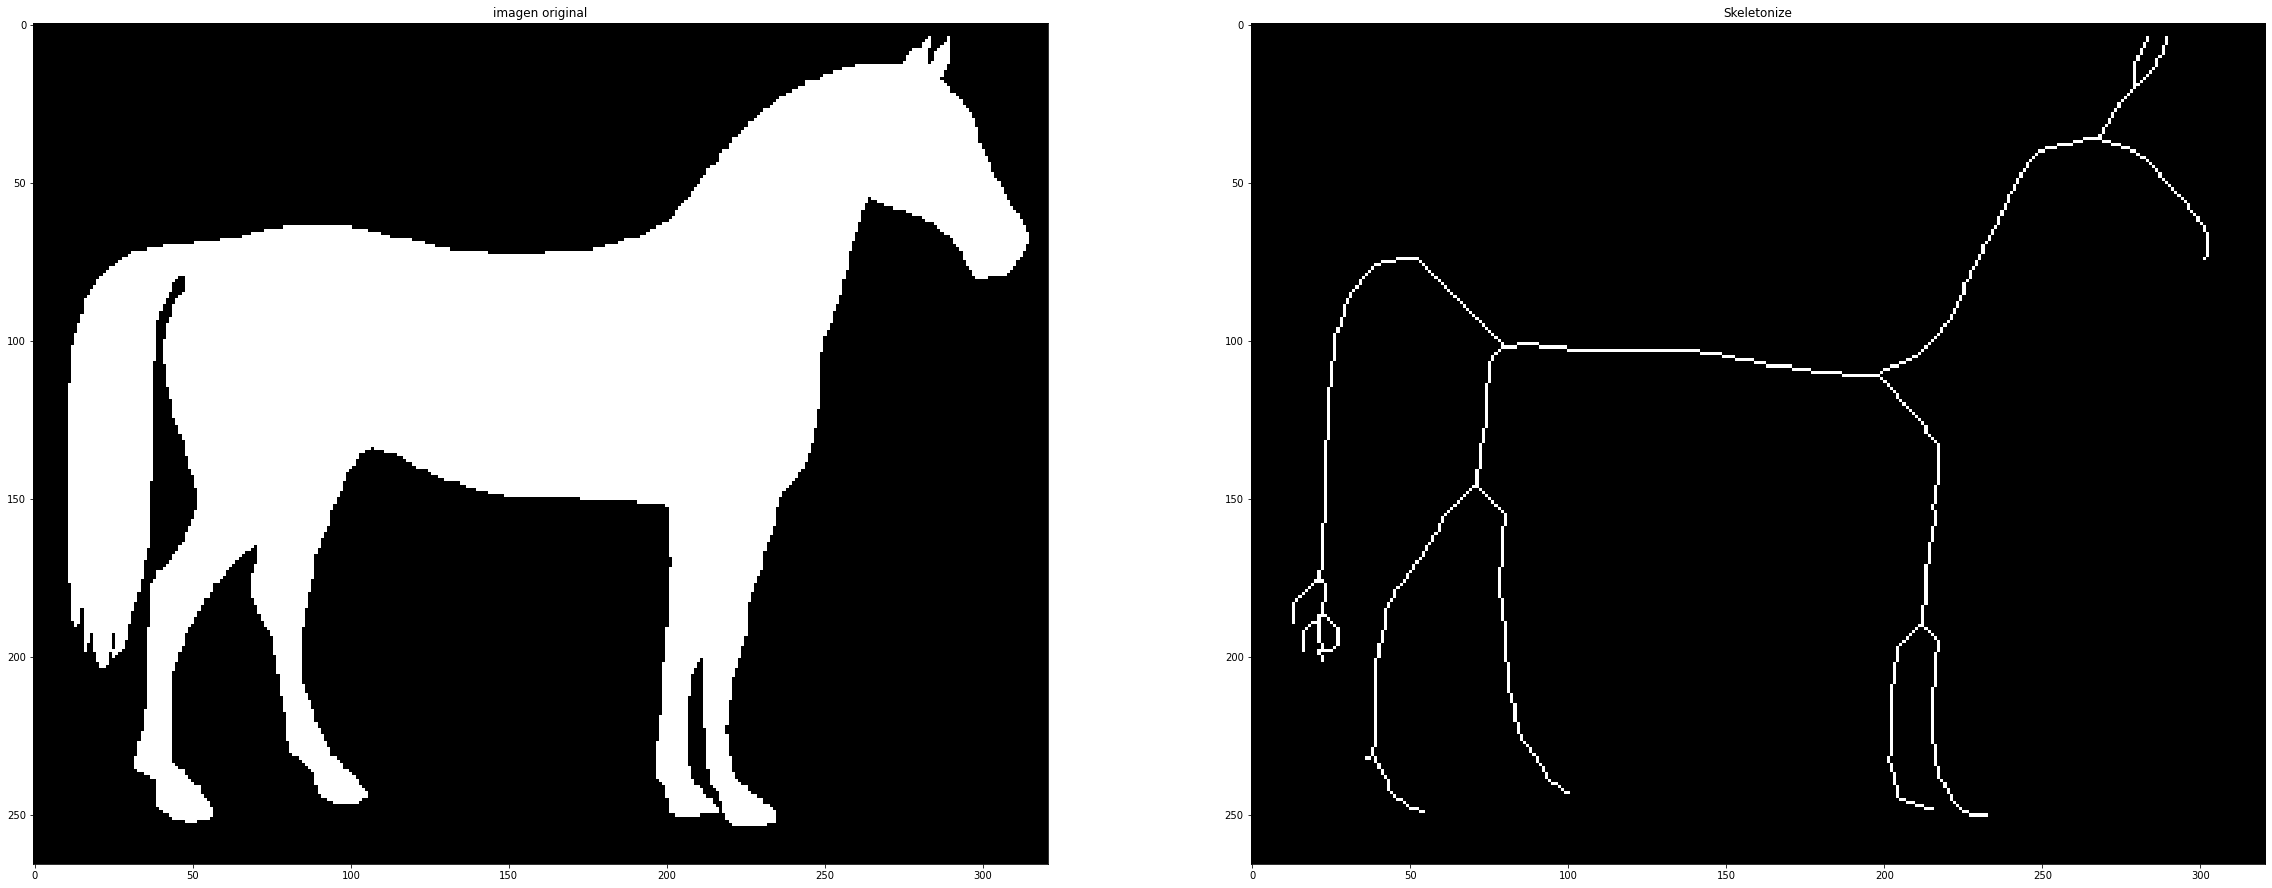

In [18]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Leer imagen de entrada, binarizarla
img = img_read('res/horse.png', "gray")
img = img > 128

#Utilizar la función skeletonize de skimage para mostrar una aproximación al esqueleto
#de la imagen de entrada
skeleton = morph.skeletonize(img)

#Generar un subplot 1x2 que muestre imagen original y su esqueleto
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(40,40))
ax1.set_title('imagen original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Skeletonize')
ax2.imshow(skeleton, cmap='gray')

# 4.2 MOMENTOS

Un descriptor de regiones bastante usado es de los Momentos Espaciales los cuales son medidas estadísticas que se calculan con base en los puntos interiores de la región.

Para una función f(x,y) continua en 2D, se define el momento de orden (p+q) como: 

<center><i>Figura. Momentos.</i></center>
<img src="res/momento1.png" alt="" style="height:100px"></img>

En una imagen esta formula se simplifica a la forma:
    
<center><i>Figura. Momentos.</i></center>
<img src="res/momento2.png" alt="" style="height:100px"></img>

De tal forma que el momento central de orden (p+q) de una imagen es (invariante a la traslación):

<center><i>Figura. Momentos.</i></center>
<img src="res/momento3.png" alt="" style="height:100px"></img>

Y el momento central normalizado de orden (p+q) (invariante a la escala y a la traslación) se define como:

# <center>  $\sigma_{pq} =  \frac{\mu_{pq}}{m_{00}^{\frac{p+q}{2}+1}}  $ </center>

Donde p + q >= 2.

* Momento Espacial de Orden Cero: Es la suma de los valores de brillo de los píxeles del objeto. Corresponde al área del objeto en imágenes binarias.

<center><i>Figura. Momentos.</i></center>
<img src="res/momento4.png" alt="" style="height:100px"></img>

m_00:  29206.0
area:  29206


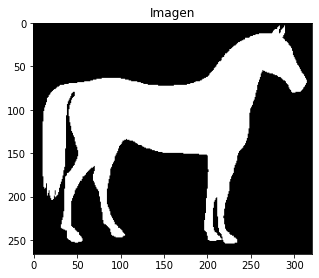

In [19]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.measure import label, regionprops

#Leer imagen de entrada, etiquetarla y hallar sus momentos
image = img_read('res/horse.png', "gray")
label_img = label(image)
props = regionprops(label_img)
momentos = props[0].moments

#Imprimir el primer momento y el área
print("m_00: ", momentos[0][0])

print("area: ", props[0].area)

#Mostrar la imagen etiquetada en el subplot
fig, ax = plt.subplots(1,1, figsize=(5, 6))


ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

* Momentos Espaciales de Orden Uno: Corresponden a las sumas en la direcciones x e y, respectivamente, de los valores de brillo de los píxeles del objeto, cada una de ellas multiplicada por su respectivo valor de coordenada x o y en la imagen.

<center><i>Figura. Momentos.</i></center>
<img src="res/momento5.png" alt="" style="height:100px"></img>


<img src="res/momento6.png" alt="" style="height:100px"></img>

* Centro de Masa o Centroide: Se calcula como:

<img src="res/momento7.png" alt="" style="height:100px"></img>


<img src="res/momento8.png" alt="" style="height:100px"></img>

**Scikit-image** calcula los momentos hasta el orden 3 y los guarda en una arreglo de 4x4 donde...

- m[0][0] corresponde a $m_{00}$.
- m[1][2] corresponde a $m_{12}$.
- m[3][3] corresponde a $m_{33}$.


momento_10:  3273874.0
momento_01:  4049083.0
momento_11:  405720094.0
centroide calculado por la librería:  (116.09593919057728, 149.63873861535302)
centroide calculado con fórmula:  (138.63873861535302, 112.09593919057728)


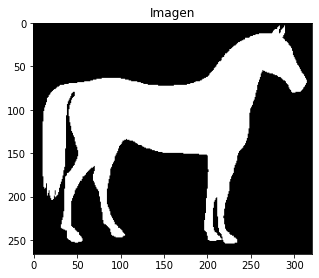

In [20]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.measure import label, regionprops

#Leer imagen de entrada, etiquetarla y encontrar sus momentos
image = img_read('res/horse.png', "gray")
label_img = label(image)
props = regionprops(label_img)
momentos = props[0].moments

#Imprimir los momentos 10,01,11
print("momento_10: ", momentos[1][0])
print("momento_01: ", momentos[0][1])
print("momento_11: ", momentos[1][1])

#Calcular el centroide por librería
centroide_rprops = props[0].centroid

#Calcular el centroide físico
centroide = (momentos[0][1]/momentos[0][0],momentos[1][0]/momentos[0][0] )

#Imprimir los resultados para comparar
print("centroide calculado por la librería: ",  centroide_rprops )
print("centroide calculado con fórmula: ",  centroide )


#Mostrar la imagen
fig, ax = plt.subplots(1,1, figsize=(5, 6))


ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

* Excentricidad: Es 1 si se trata de una recta y 0 si se trata de un círculo.

<img src="res/exc.png" alt="" style="height:100px"></img>

Con los Momentos Espaciales se pueden definir dos características que suelen proporcionar una capacidad discriminatoria notoria entre las regiones:

* Orientación: 

<img src="res/orientation.png" alt="" style="height:100px"></img>

Orientación (radianes):  -1.3086866507812627
Excentricidad:  0.5335105244537437


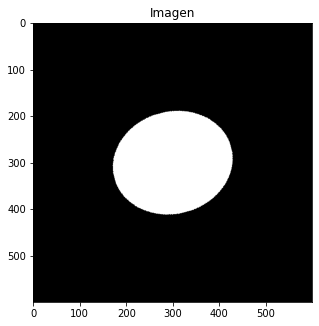

In [21]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.measure import label, regionprops


#image = img_read('res/horse.png', "gray")

#Crear matriz de ceros 600x600, crear una elipse y rotarla 15°
image = np.zeros((600, 600))

rr, cc = ellipse(300, 300, 110, 130)
image[rr, cc] = 1
image = rotate(image, angle=15, order=0)

#Etiquetar la imagen, dado que solo esta la elipse, encontrar la orientación y la 
#excentricidad de ésta región
label_img = label(image)
props = regionprops(label_img)
orientacion = props[0].orientation
excentricidad = props[0].eccentricity

#Imprimir la orientación y la excentricidad
print("Orientación (radianes): ", orientacion )
print("Excentricidad: ", excentricidad)

#Mostrar la imagen de la elipse creada
fig, ax = plt.subplots(1,1, figsize=(5, 6))


ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

# 4.3 MOMENTOS DE HU

Los momentos de Hu se derivan a partir de los momentos vistos anteriormente. Su particularidad es que son invariantes a  la traslación, la escala y la rotación, lo que los hace muy efectivos para la extracción de características de forma y hace obsoletos a los otros momentos.

Una descripción detallada de los momentos de Hu se encuentra en los siguientes enlaces: 

https://www.learnopencv.com/shape-matching-using-hu-moments-c-python/
https://www.researchgate.net/publication/224146066_Analysis_of_Hu's_moment_invariants_on_image_scaling_and_rotation

La principal consideración a tener en cuenta es que los primeros 6 momentos de Hu son invariantes a traslación, escala y rotación, mientras que el séptimo puede cambiar de signo si la imagen se invierte horizontalmente.

La segunda consideración es que los momentos de Hu tienen un rango de valores muy amplio, por lo que se recomienda trabajar con su logaritmo.

Momentos Hu:  [ 3.21302815e-01  3.32634664e-02  3.10473478e-03  7.37543530e-05
 -3.52765807e-08  4.00836534e-06 -1.09009986e-09]
Logaritmos de los Momentos Hu:  [  1.13537125   3.40329559   5.77482699   9.51477054 -17.16004653
  12.42712705 -20.63699653]


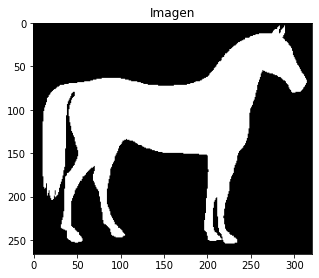

In [22]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.measure import label, regionprops

#Leer imagen de entrada, etiquetarla y utilizar la función moments_hu para hallar la
#matriz de momentos hu asociados a cada región etiquetada
image = img_read('res/horse.png', "gray")
label_img = label(image)
props = regionprops(label_img)
momentos_hu = props[0].moments_hu

#Imprimir la matriz de momentos hu
print("Momentos Hu: ", momentos_hu)

#Aplicar logaritmo a la matriz de momentos hu e imprimirla
momentos_hu_log = - np.sign(momentos_hu) * np.log(np.abs(momentos_hu))

print("Logaritmos de los Momentos Hu: ", momentos_hu_log)

#Mostrar la imagen sobre la cual se trabaja
fig, ax = plt.subplots(1,1, figsize=(5, 6))


ax.set_title('Imagen')
ax.imshow(label_img, cmap='gray', vmin=0, vmax=1)

# 5 DESCRIPTORES DE COLOR Y TEXTURA

# 5.1 TEXTURA
L as Texturas ofrecen información sobre la ordenación espacial de los niveles de gris (o de los
colores) en una imagen.

<center><i>Figura. Textura.</i></center>
<img src="res/text.png" alt="" style="height:300px"></img>

Para el manejo de descriptores de color y de textura, es importante tener en cuenta que estamos trabajando con atributos que están presentes en la imagen original y no en la máscara. Sin embargo, esto no significa que debamos trabajar con la imagen original. La mejor práctica consiste en multiplicar la imagen original por la máscara para obtener una imagen a color segmentada que contenga únicamente la información que nos interesa. Por ejemplo, no tiene sentido incluir dentro de nuestros calculos una textura o un área de color distinto al del objeto de interés.

Para la extracción de características se pueden tener en cuenta las propiedades estadística de la imagen, con lo que se analiza la distribución estadística de alguna propiedad para cada uno de los píxeles de la imagen.


Se clasifican en: métodos de primer orden (aquéllos basados en el histograma), métodos de segundo orden (los basados en matrices de co-ocurrencias), y métodos de órdenes superiores.


# 5.2 MÉTODOS ESTADÍSTICOS DE PRIMER ORDEN

Se calcula el histograma de la imagen. A cada valor del histograma se lo divide por el número total de píxeles de la imagen, se tiene un histograma de probabilidades de niveles de gris h. A partir de este, se calculan las propiedades estadísticas básicas (media, desviación estándar, curtosis y asimetría) de cualquier canal de color de cualquier espacio de color. Hoy trabajaremos con los siguientes:

* Rojo, azul y verde del espacio de color RGB.
* Luminancia del espacio de color LAB.
* Saturación y valor del espacio de color HSV.

Ya conocemos la definición de la media y de la esviación estándar. En cuanto a la la asimetría, se trata de una métrica de la falta de simetría en una distribución. Una distribución es simétrica si tiene el mismo aspecto a la izquierda y a la derecha de su punto central. La curtosis es una medida de si los datos tienen una cola pesada o ligera en relación con una distribución normal. Es decir, se trata de una medida de la cantidad de datos atípicos.

Los anteriores son conocidos como Métodos Estadíticos de Primer Orden. 

<img src="res/est1orden.png" alt="" style="height:500px"></img>

El uso de los canales de luminancia, saturación y valor se justifica por la toma de imágenes bajo distintas condiciones de iluminación y distintos colores de piel. Asimismo, se hace uso de las propiedades estadísticas del color ya que es uno de los aspectos que contiene mayor cantidad de información en las imágenes estudiadas. 

<center><i>Figura. Estadísticos de primer orden.</i></center>
<img src="res/est1orden2.png" alt="" style="height:500px"></img>

## DESVENTAJAS: 

* No captan toda la información espacial.
* Mismo resultado para un tablero de ajedrez que para otro con los colores blanco y negro intercambiados.

In [23]:
#Importar librerías
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

#Definir funciones de conversión de imágenes de un canal a otro, de
#correción de BGR a RGB, y pasar a escala de grises
def bgr_to_gray(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

def rgb_to_gray(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

def bgr_to_rgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


def rgb_to_lab(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2LAB)


def rgb_to_hsv(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

Extraigamos características de un pez...

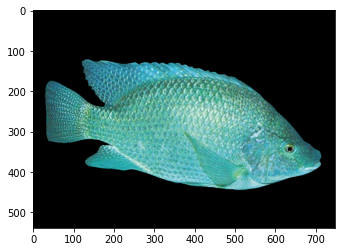

In [24]:
#Definir la función para obtener características del espacio LAB y HSV
def get_lab_hsv_features(im, mask, features):
    #La imagen de entrada debe estar en el espacio RGB
    #Extraer el tamaño de la imagen de entrada y convertirla a LAB y HSV
    shape = np.shape(im)
    im_lab = rgb_to_lab(im)
    im_hsv = rgb_to_hsv(im)
    
    #Definir los canales l,a,b por separado
    l = im_lab[:,:,0]
    s = im_hsv[:,:,1]
    v = im_hsv[:,:,2]
    #Definir listas vacías de canales h,s,v
    h_1 = []
    s_1 = []
    v_1 = []
    
    #Recorrer cada posición i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array verdadero añadir
            #a cada canal del nuevo HSV el píxel en esta posición
            if((mask[i][j] == np.array([True, True, True])).all() ):
                h_1.append(l[i][j])
                s_1.append(s[i][j])
                v_1.append(v[i][j])
                
    #Utilizar features para guardar los valores de media, desviación estándar, kurtosis y sesgo
    #de cada uno de los canales h_1, s_1, v_1
    features['h_mean'] = np.mean(h_1)
    features['h_std'] = np.std(h_1)
    features['h_kurtosis'] = kurtosis(h_1)
    features['h_skew'] = skew(h_1)
    features['s_mean'] = np.mean(s_1)
    features['s_std'] = np.std(s_1)
    features['v_kurtosis'] = kurtosis(v_1)
    features['v_skew'] = skew(v_1)
    features['v_mean'] = np.mean(v_1)
    features['v_std'] = np.std(v_1)
    features['s_kurtosis'] = kurtosis(s_1)
    features['s_skew'] = skew(s_1)
    return features

#Definir función para extraer características del espacio RGB
def get_rgb_features(im,mask, features):
    #Crear una matriz del mismo tamaño de la imagen de entrada, leer los canales R,G,B y 
    #crear listas vacías donde se aplica la máscara
    shape = np.shape(im)
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    r_1 = []
    g_1 = []
    b_1 = []
    #Recorrer las posiciones i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array de True, añadir
            #a cada canal del nuevo espacio RGB el píxel en esta posición
            if( (mask[i][j] == np.array([True, True, True])).all() ): 
                r_1.append(r[i][j])
                g_1.append(g[i][j])
                b_1.append(b[i][j])
    #Utilizar features para guardar los valores de media, desv.estandar, kurtosis y sesgo
    #de los canales r_1,g_1,b_1
    features['r_mean'] = np.mean(r_1)
    features['r_std'] = np.std(r_1)
    features['r_kurtosis'] = kurtosis(r_1)
    features['r_skew'] = skew(r_1)
    features['g_mean'] = np.mean(g_1)
    features['g_std'] = np.std(g_1)
    features['b_kurtosis'] = kurtosis(b_1)
    features['b_skew'] = skew(b_1)
    features['b_mean'] = np.mean(b_1)
    features['b_std'] = np.std(b_1)
    features['g_kurtosis'] = kurtosis(g_1)
    features['g_skew'] = skew(g_1)
    return features

#Función de extracción de características de los canales rgb, lab-hsv
def features_pipeline(img, mask):
    features = {}
    features = get_rgb_features(img,mask,features)
    features = get_lab_hsv_features(img,mask,features)
    return features

#Leer imagen de entrada, una máscara de entrada binarizada
img = img_read("res/segm/1.jpg", "color")
mask = img_read("res/segm/1.tif", "color")
mask = mask > 128

#Multiplicar imagen de entrada por la máscara
img = img*(mask)

#Invocar el diccionario de características
features = features_pipeline(img, mask)
plt.imshow(img)

In [25]:
features

{'r_mean': 85.76250814616743,
 'r_std': 35.923684410617746,
 'r_kurtosis': 0.0016667365373468357,
 'r_skew': 0.5639700247965855,
 'g_mean': 166.90152039397216,
 'g_std': 34.62432137157894,
 'b_kurtosis': -0.3079548039349298,
 'b_skew': -0.26029794516033283,
 'b_mean': 161.75666306107777,
 'b_std': 34.969407772866454,
 'g_kurtosis': -0.1470441421468709,
 'g_skew': -0.4283878267127785,
 'h_mean': 161.67660555081528,
 'h_std': 32.653246261770576,
 'h_kurtosis': -0.08965795166405632,
 'h_skew': -0.39841333227527204,
 's_mean': 130.81195622232823,
 's_std': 33.478614852527805,
 'v_kurtosis': -0.12416292923922922,
 'v_skew': -0.41439626984645006,
 'v_mean': 170.43744751180773,
 'v_std': 34.233720780616885,
 's_kurtosis': -0.14254685735860928,
 's_skew': -0.05211696608129321}

# 5.3 MÉTODOS ESTADÍSTICOS DE SEGUNDO ORDEN

Los estadísticos basados en el histograma tienen el inconveniente de perder la información espacial, por lo que se obtendría la misma información para una imagen de un tablero de ajedrez que para una imagen mitad blanca y mitad negra.


Para capturar las dependencias espaciales de los valores de niveles de gris, que contribuyen a la percepción de las texturas presentes en una imagen, se define una estructura 2D llamada Matriz de Co-ocurrencias para analizar texturas.

La matriz de coocurrencias P[i,j] se define especificando una dirección de desplazamiento d=(di ,dj ) y contando todos los pares de píxeles separados por d y que tienen valores de gris i y j.

<center><i>Figura. Estadísticos Segundo Orden.</i></center>
<img src="res/segundoorden.png" alt="" style="height:200px"></img>

## Ejemplo  de Matriz de Co-ocurrencia: 

Dada la imagen de 5×5 con tres niveles de gris (0, 1 y 2)-

<center><i>Figura. Matriz de Co-Ocurrencia.</i></center>
<img src="res/segundoorden2.png" alt="" style="height:200px"></img>

Como hay tres niveles de gris, P[i,j] es de tamaño 3×3. Sea, por ejemplo d=(1,1). En la imagen existen 16 pares de píxeles que satisfacen esta separación espacial. La matriz P[i,j] resultante para este valor de d es:


<center><i>Figura. Matriz de Co-Ocurrencia.</i></center>
<img src="res/segundoorden3.png" alt="" style="height:200px"></img>

Debido al gran tamaño de esta, generalmente se usan atributos generalizados de la misma como características. Entre estas se encuentran  la energía, la inercia, la correlación, el momento de diferencias y la entropía, entre otras, las cuales permiten obtener una representación resumida de las texturas de una imagen.



Para analizar texturas pueden calcularse diferentes matrices de co-ocurrencias de la misma imagen con diferentes valores de d.


<center><i>Figura. Matriz de Co-Ocurrencia.</i></center>
<img src="res/segundoorden4.png" alt="" style="height:500px"></img>

Tutorial muy detallado: https://prism.ucalgary.ca/handle/1880/51900

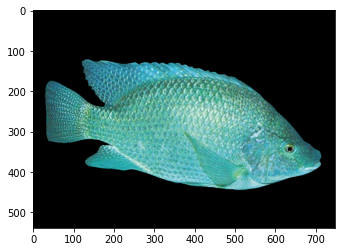

In [26]:
#Importar librerías
from skimage.feature import graycomatrix, graycoprops

#Función de estadísticos de segundo orden
def get_glcm_features(img,features):
    
    #Calcular el nivel co-ocurrente de gris
    glcm = graycomatrix(img, [1,2,3], [0], 256, symmetric=True, normed=True)
    #Calcular la dissimilaridad, contraste, homogeneidad, ASM, energía y correlación, guardar esto en la matriz
    #de features
    features['dissimilarity'] = graycoprops(glcm, 'dissimilarity')[0][0]
    features['contrast'] = graycoprops(glcm, 'contrast')[0][0]
    features['homogeneity'] = graycoprops(glcm, 'homogeneity')[0][0]
    features['ASM'] = graycoprops(glcm, 'ASM')[0][0]
    features['energy'] = graycoprops(glcm, 'energy')[0][0]
    features['correlation'] = graycoprops(glcm, 'correlation')[0][0]
    
    return features


#Función de features
def features_pipeline(img, mask):
    #Crear la matriz para guardar las características
    features = {}
    #Convertir la imagen de RGB a escala de grises
    img_gray = rgb_to_gray(img)
    #features = get_rgb_features(img,mask,features)
    #Obtener las características de la imagen
    features = get_glcm_features(img_gray, features)
    return features


#Leer la imagen de entrada y una máscara, posteriormente binarizarla
img = img_read("res/segm/1.jpg", "color")
mask = img_read("res/segm/1.tif", "color")
mask = mask > 128

#Multiplicar imagen por la máscara binarizada
img = img*(mask)

#Invocar diccionario que contiene las características de segundo orden de la imagen
features = features_pipeline(img, mask)

#Mostrar la imagen
plt.imshow(img)

In [27]:
#Imprimir el diccionario
features

{'dissimilarity': 4.453052780075804,
 'contrast': 113.91271455645011,
 'homogeneity': 0.6688205834637133,
 'ASM': 0.39600604164485204,
 'energy': 0.6292901092857348,
 'correlation': 0.9888827386354583}

Guardar nuestras características como diccionario nos permite generar estructuras de datos fáciles de almacenar con gran facilidad aprovechando librerías como Pandas.


In [28]:
import pandas as pd 

columns = list(features.keys())
columns.append('class')
df = pd.DataFrame(columns=columns)
i = 0
df.loc[i] = [features[feature] for feature in features.keys()]+[1]
i = 1
df.loc[i] = [features[feature] for feature in features.keys()]+[1]
df.to_csv('data4.csv')

# ACTIVIDAD 6

- Cree una función **features_pipeline** que reciba la imagen original y su máscara, y a partir de esta calcule los descriptores de forma vistos anteriormente (basta con momentos de Hu) y los guarde en un diccionario junto con los descriptores de color y textura vistos en la sección anterior.


# 10.6 DESCRIPTORES AVANZADOS

Al igual que en la segmentación, hay multitud de enfoques para la extracción de características. Algunos de ellos son:

- Descriptores basados en Transformaciones de Dominio (Hough, Fourier, Wavelet...):
https://www.sciencedirect.com/science/article/abs/pii/S0143816606001990 
http://demonstrations.wolfram.com/FourierDescriptors/
http://fourier.eng.hmc.edu/e161/lectures/fd/node1.html
http://www.tsi.enst.fr/pages/enseignement/ressources/mti/descript_fourier/Part1.html


- Análisis de componentes principales:

A partir del PCA y del uso de vectores propios, es posible obtener descriptores para clasificación.

http://www.visiondummy.com/2014/05/feature-extraction-using-pca/

- Descriptores avanzados de textura (Gabor...)

http://scikit-image.org/docs/0.11.x/auto_examples/plot_gabor.html
http://ttsuchi.github.io/2015/08/26/gaborfilters.html
https://pdfs.semanticscholar.org/c059/4fd3539de73957af1f218e6594cfdf741647.pdf
https://www.sciencedirect.com/science/article/abs/pii/S0167865502000569

- Template matching:

https://docs.opencv.org/2.4.13.7/doc/tutorials/imgproc/histograms/template_matching/template_matching.html

- Descriptores de puntos clave (SIFT, SURF, OBR) [ojo! algunos son funciones patentadas]:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html
https://pysource.com/2018/03/21/feature-detection-sift-surf-obr-opencv-3-4-with-python-3-tutorial-25/


- Redes neuronales convolucionales (VGG-19 para clasificación, YOLO para detección de objetos, UNET para segmentación):

Las redes neuronales convolucionales 'almacenan' descriptores en los pesos de la red, eliminando la necesidad de extraer características previo a la clasificación pero añadiendo un costo computacional muy grande.

https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf
http://aircconline.com/ijcsit/V10N2/10218ijcsit06.pdf


Cabe anotar que algunos de los algoritmos citados no generan descriptores propiamente dichos, sino que utilizan la extracción de características como parte de un esquema de detección de puntos de interés o de comparación de imágenes.